# SMOTE-NC

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)

Extends SMOTE functionality to categorical variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTENC

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# add categorical features
rng = np.random.RandomState(42)
X['VarC'] = rng.choice(['A', 'B', 'C'], size=num_samples_total).astype(object)
X['VarD'] = rng.choice(['Blue', 'Green', 'Red'], size=num_samples_total).astype(object)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 4), (1000,))

In [3]:
X.head()

,VarA,VarB,VarC,VarD
0,-1.131096,0.921087,C,Green
1,-1.088788,-2.007435,A,Blue
2,3.105023,-0.323379,C,Blue
7,1.106942,0.251657,B,Blue
10,-1.418519,-2.368256,C,Blue


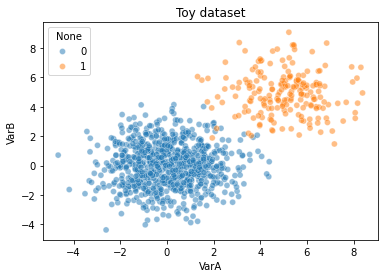

In [4]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

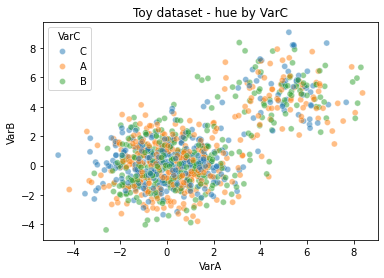

In [5]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarC', alpha=0.5
)

plt.title('Toy dataset - hue by VarC')
plt.show()

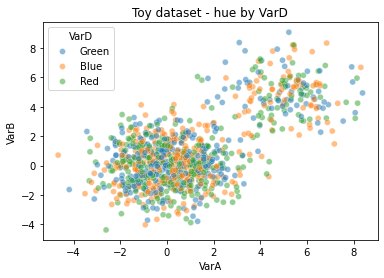

In [6]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarD', alpha=0.5
)

plt.title('Toy dataset - hue by VarD')
plt.show()

## SMOTE-NC

[SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

In [7]:
smnc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    categorical_features=[2,3] # indeces of the columns of categorical variables
)  

X_res, y_res = smnc.fit_resample(X, y)

In [8]:
# size of original data

X.shape, y.shape

((1000, 4), (1000,))

In [9]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 4), (1600,))

In [10]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

In [11]:
X.tail()

,VarA,VarB,VarC,VarD
194,5.418310,5.363947,C,Blue
1325,5.623817,5.814600,B,Blue
363,5.857736,5.618902,B,Green
1587,5.438490,8.220891,C,Red
1135,7.555272,3.031912,A,Green


In [12]:
X_res.tail()

,VarA,VarB,VarC,VarD
1595,8.163453,4.975632,B,Red
1596,6.405112,5.545140,B,Blue
1597,5.172862,4.407259,A,Red
1598,4.851173,5.485118,A,Red
1599,4.483396,3.075884,B,Red


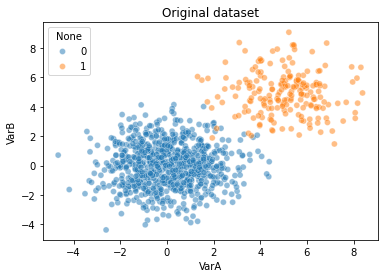

In [13]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

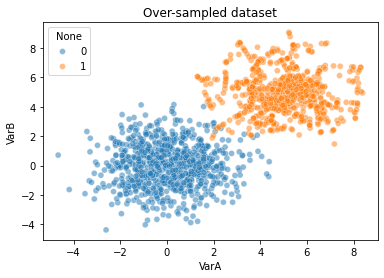

In [14]:
# plot of original data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

There are now new observations that differ from the original ones. 

**HOMEWORK**

- Test SMOTENC in one of your own datasets that contain a mix of numerical and categorical variables. See if it improves model performance.

- If it does not, play with the strategy and the number of neighbours.